# PTSDDB Tutorial

### Investigate the relative changes of the five most common biomarkers in the database (Figure 2a from the manuscript)

Author: [Daniel Domingo-Fernández](https://github.com/ddomingof)

More details about the PTSDDB API in the links below:
- Swagger UI: https://ptsd.scai.fraunhofer.de/swagger-ui
- Database Schema: https://ptsd.scai.fraunhofer.de/static/ptsd/img/db_schema.png

Python libraries required

In [1]:
import time
import sys
import json
import urllib.request
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt

In [2]:
time.ctime()

'Fri May  3 11:31:44 2019'

In [3]:
sys.version

'3.6.5 (default, Apr 20 2018, 08:54:42) \n[GCC 4.8.5 20150623 (Red Hat 4.8.5-16)]'

In [4]:
%matplotlib inline

Load data from API endpoint.
This endpoint returns all the relative changes for all the biomarkers in the database as a JSON object

In [5]:
with urllib.request.urlopen("http://ptsd.scai.fraunhofer.de/api/biological_substrate/count") as url:
    data = json.loads(url.read().decode())

Select your biomarkers of interest and retrieve their relative counts

In [6]:
FIGURE_SUBSTRATES = ['Cortisol', 'BDNF', 'FKBP5', 'IL6', 'NR3C1']

In [7]:
counts = defaultdict(list)

for substrate, biomarkers in data.items():
    
    for biomarker, count in biomarkers.items():
    
        if biomarker not in FIGURE_SUBSTRATES:
            continue
        
        counts[biomarker].append((substrate, count))

Results of the query

In [8]:
counts

defaultdict(list,
            {'NR3C1': [('DNA', 2),
              ('DNA methylation', 3),
              ('RNA', 1),
              ('protein', 2)],
             'BDNF': [('DNA', 2), ('DNA methylation', 1), ('protein', 15)],
             'FKBP5': [('mRNA', 7), ('RNA', 1)],
             'IL6': [('protein', 5)]})

Plot barplot to visualize the results

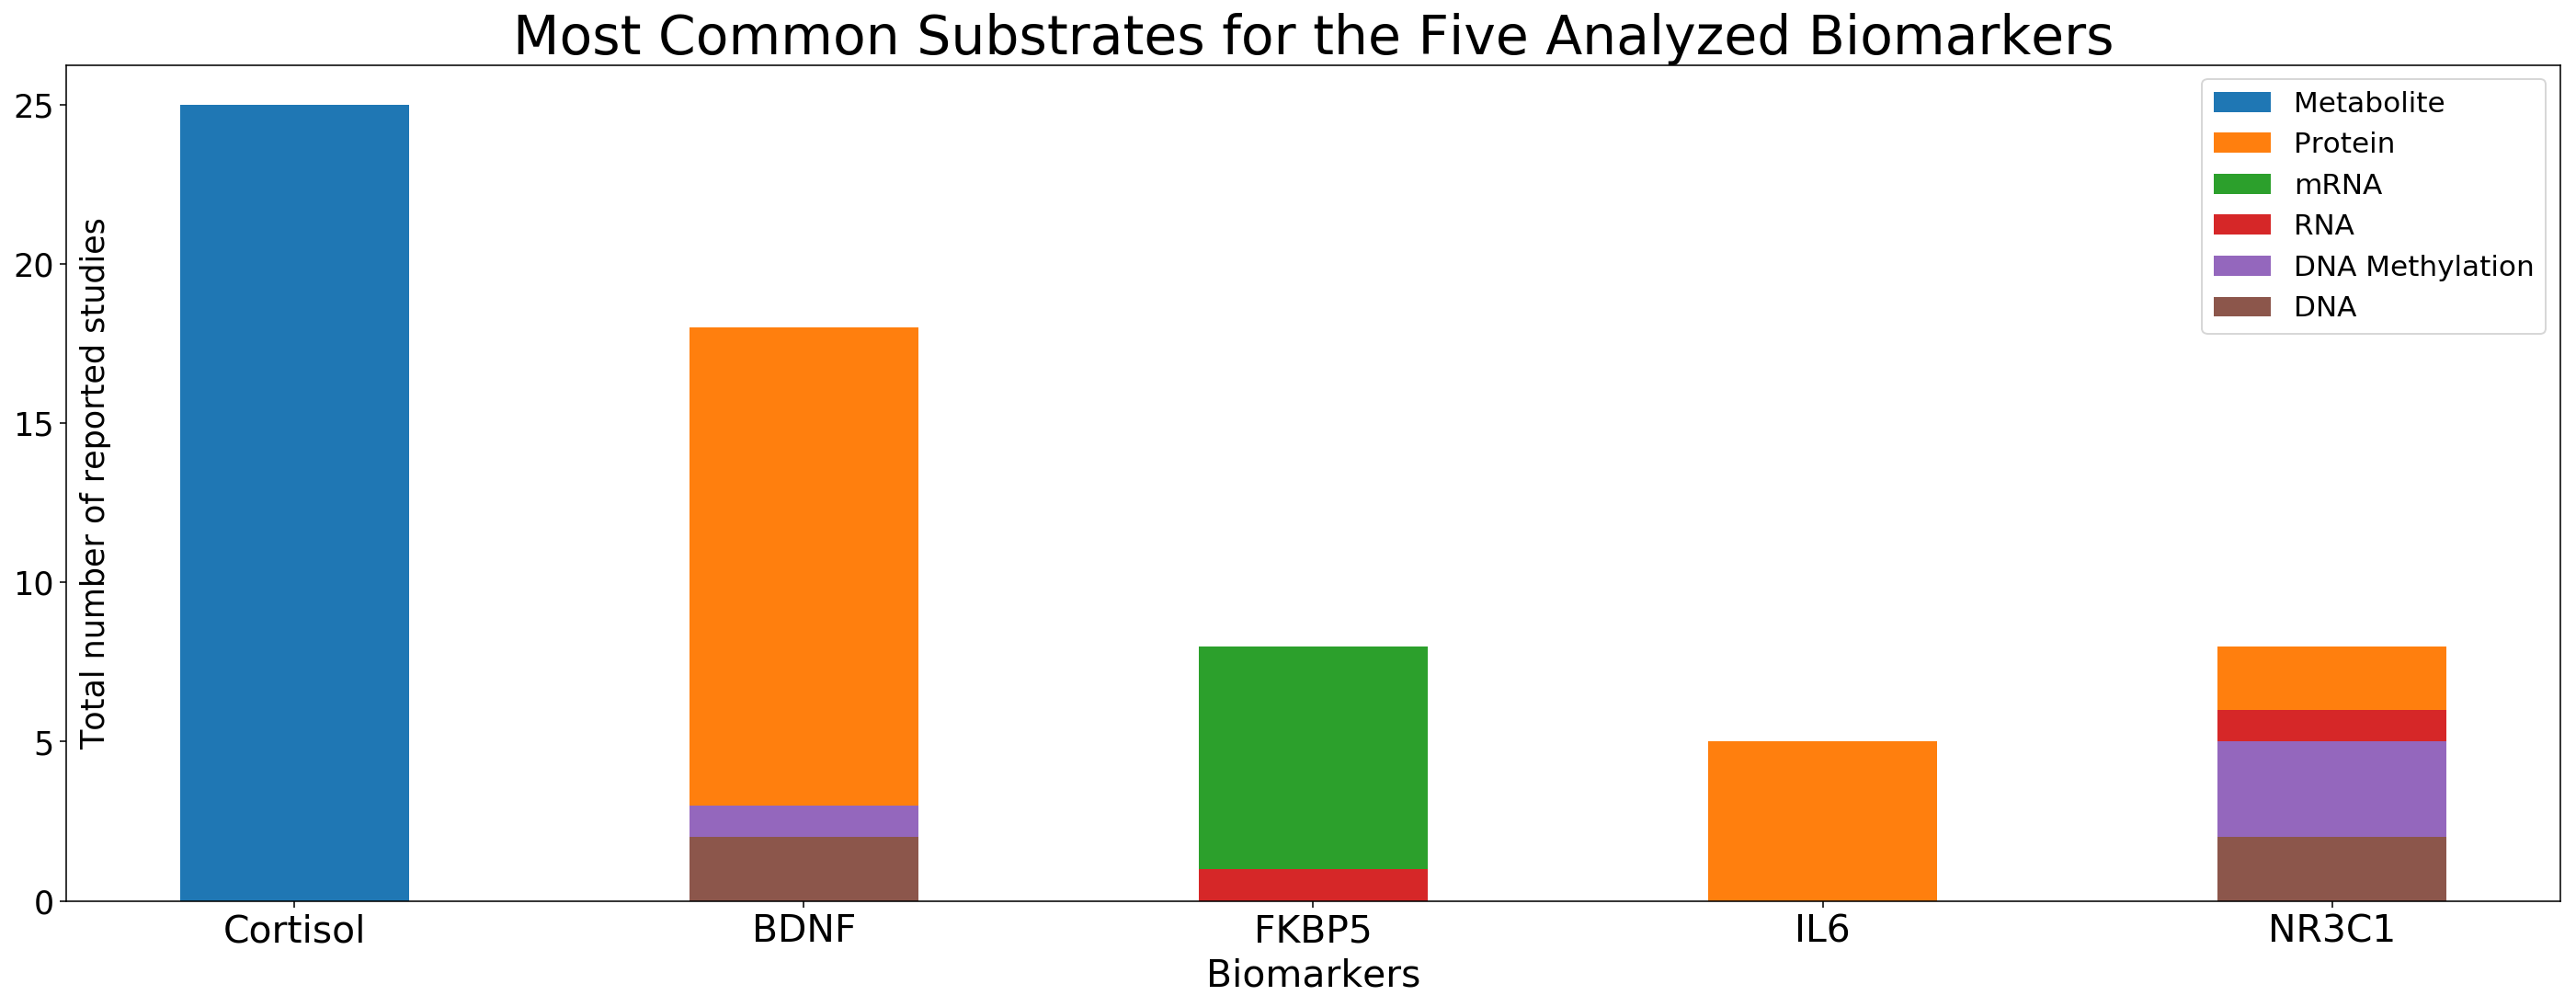

In [9]:
fig = plt.figure(figsize=(25, 8.6), dpi=140)

metabolite = np.array([25, 0, 0, 0, 0])
protein = np.array([0, 15, 0, 5, 2])
mrna = np.array([0, 0, 7, 0, 0])
dna_methylation = np.array([0, 1, 0, 0, 3])
rna = np.array([0, 0, 1, 0, 1])
dna = np.array([0, 2, 0, 0, 2])

ind = [
    x
    for x, _ in enumerate(FIGURE_SUBSTRATES)
]

plt.bar(ind, metabolite, width=0.45, label='Metabolite', bottom=rna+dna+dna_methylation+mrna+protein)
plt.bar(ind, protein, width=0.45, label='Protein', bottom=rna+dna+dna_methylation+mrna)
plt.bar(ind, mrna, width=0.45, label='mRNA', bottom=rna+dna+dna_methylation)
plt.bar(ind, rna, width=0.45, label='RNA', bottom=dna+dna_methylation)
plt.bar(ind, dna_methylation, width=0.45, label='DNA Methylation', bottom=dna)
plt.bar(ind, dna, width=0.45, label='DNA')

plt.yticks(fontsize = 18)
plt.xticks(ind, FIGURE_SUBSTRATES, fontsize = 21)
plt.ylabel("Total number of reported studies", labelpad=-55, fontsize = 18)
plt.xlabel("Biomarkers", fontsize = 21)
plt.legend(loc="upper right", fontsize = 16)
plt.title("Most Common Substrates for the Five Analyzed Biomarkers", fontsize = 30)

plt.show()